# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [2]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
# df = pd.read_csv("/content/drive/MyDrive/PRO_ML/Fundamental-ML/data/icml_face_data.csv")
df1 = df.copy()
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code

---

ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)


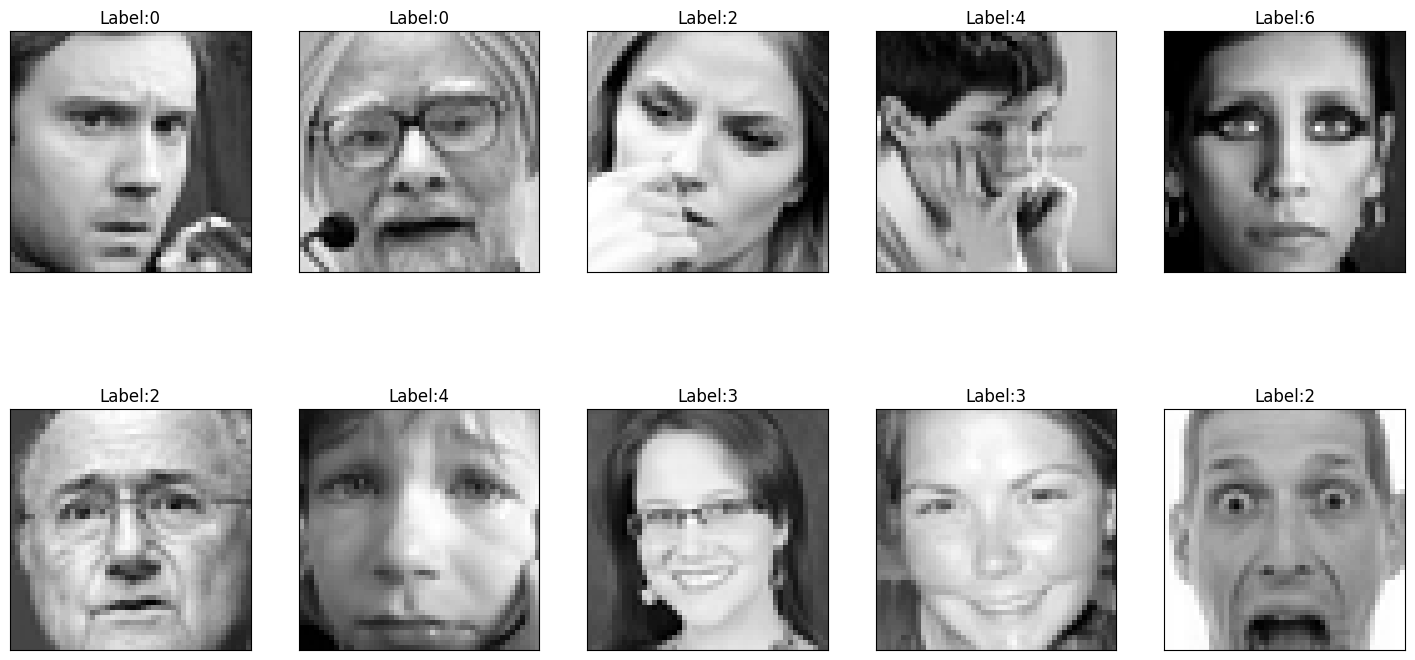

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

Answer: The code below will produce a scatter plot where each point represents an image projected onto the first two principal components, with colors indicating different emotion labels. This provides a visual representation of how different emotions are distributed in the reduced two-dimensional space.

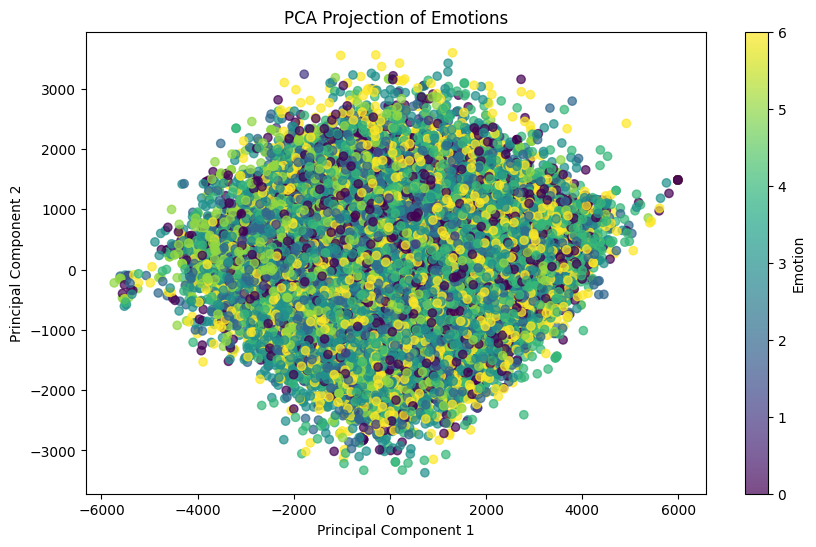

In [ ]:
from sklearn.decomposition import PCA

df = pd.DataFrame(df, columns=["emotion", "pixels"])

# Preprocess the Data
df["pixels"] = df["pixels"].apply(lambda x: np.array(list(map(int, x.split()))))

# Find the length of the longest pixel array
max_length = max(df["pixels"].apply(len))

# Pad shorter arrays with zeros
df["pixels"] = df["pixels"].apply(lambda x: np.pad(x, (0, max_length - len(x)), 'constant'))

# Stack pixel data into a numpy array
X = np.vstack(df["pixels"].values)
y = df["emotion"].values

# Apply PCA
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)

def show_pca_image(images: np.ndarray, labels: np.ndarray):
    """
    Visualize PCA results with labels
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(images[:, 0], images[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title("PCA Projection of Emotions")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(scatter, label='Emotion')
    plt.show()

# Show PCA results
show_pca_image(X_pca, y)


Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

To determine the optimal number of principal components using ```pca.explained_variance```, we typically follow a systematic process that involves calculating the cumulative explained variance and selecting components based on predefined thresholds. </br>
Below is a step-by-step explanation of the selection process:

In [ ]:
## determine the optimal number of PCs here
## pca.explained_variance_()
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.2892651, 0.387289 ])

The first principal component explains approximately 28.93% of the variance. </br>
The second principal component explains approximately 38.73% of the variance

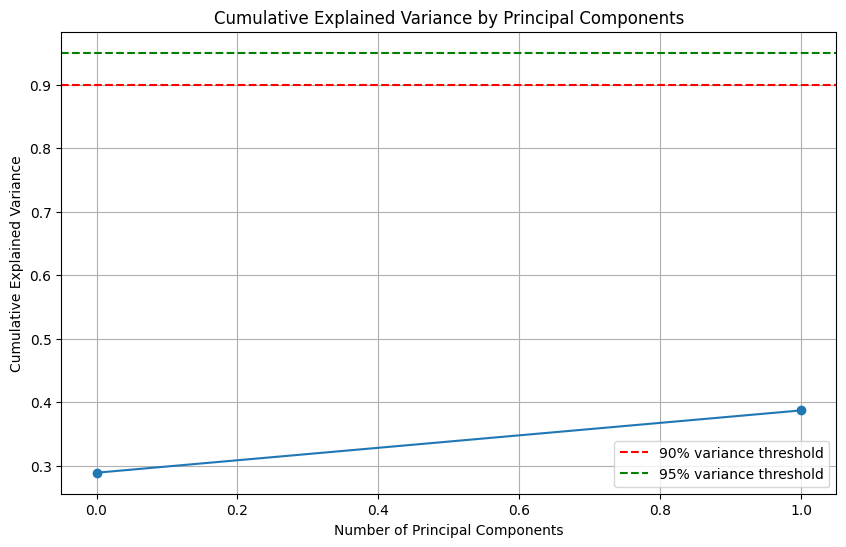

Optimal number of components for 90.0% variance: 1


In [ ]:


# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance threshold')
plt.legend()
plt.show()

# Determine the number of components to reach the desired threshold (e.g., 90% variance)
threshold = 0.9
optimal_components = np.argmax(cumulative_variance >= threshold) + 1

optimal_components
print(f"Optimal number of components for {threshold*100}% variance: {optimal_components}")

The total explained variance after the first component (0.2892651) equals or exceeds the 90% level.</br>
As a result, one component accounts for 90% of the variance.</br>
Based on the cumulative explained variance values, the first main component can explain 90% of the variance. This demonstrates that only one principal component is required to capture the majority of the data set's variance while maintaining the desired threshold.

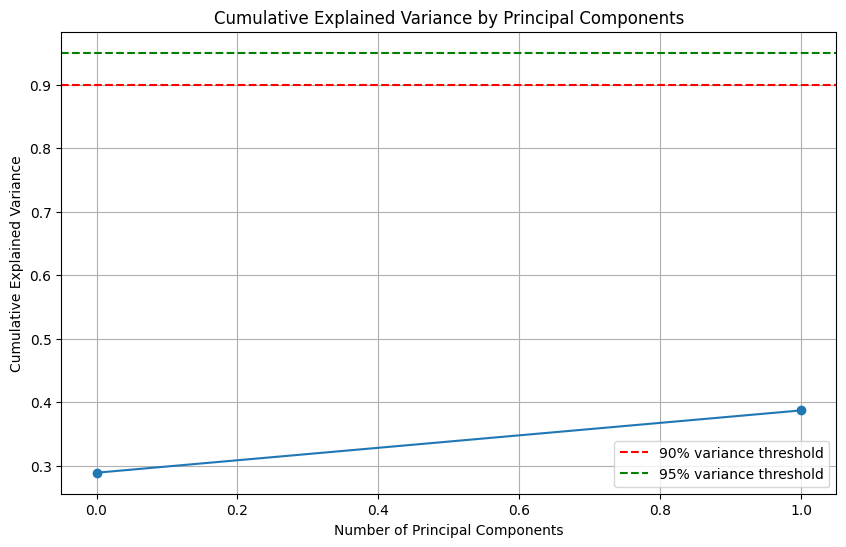

Optimal number of components for 90.0% variance: 1


In [ ]:


# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance threshold')
plt.legend()
plt.show()

# Determine the number of components to reach the desired threshold (e.g., 90% variance)
threshold = 0.9
optimal_components = np.argmax(cumulative_variance >= threshold) + 1

optimal_components
print(f"Optimal number of components for {threshold*100}% variance: {optimal_components}")

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
df1.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [ ]:
img_array = df1.pixels.apply(lambda x: np.array(x.split(' ')).astype('float32'))
img_array = np.stack(img_array, axis=0)
img_labels = labels


In [ ]:
# ## splitting data into train/val/test subsets here
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels, test_size=0.2, random_state=42)

# X_train = X_train/255.0
# X_test = X_test/255.0
# # Verify the shapes of the splits
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")


X_train shape: (28709, 2304)
X_test shape: (7178, 2304)
y_train shape: (28709,)
y_test shape: (7178,)


### MLP models (Original data)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# from sklearn.metrics import accuracy_score
# clf = MLPClassifier(hidden_layer_sizes=(150,150,150,150), max_iter=5000, alpha=0.0001,
#                       verbose=1,  random_state=45,tol=0.000000001)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))

Iteration 1, loss = 1.79044354
Iteration 2, loss = 1.68695114
Iteration 3, loss = 1.64554171
Iteration 4, loss = 1.64220580
Iteration 5, loss = 1.61132651
Iteration 6, loss = 1.59054596
Iteration 7, loss = 1.58559159
Iteration 8, loss = 1.56570299
Iteration 9, loss = 1.55463302
Iteration 10, loss = 1.54554104
Iteration 11, loss = 1.53075106
Iteration 12, loss = 1.51925688
Iteration 13, loss = 1.50953628
Iteration 14, loss = 1.49368854
Iteration 15, loss = 1.49241763
Iteration 16, loss = 1.47210176
Iteration 17, loss = 1.47055944
Iteration 18, loss = 1.45160479
Iteration 19, loss = 1.43505952
Iteration 20, loss = 1.42608380
Iteration 21, loss = 1.41532182
Iteration 22, loss = 1.40510903
Iteration 23, loss = 1.39619110
Iteration 24, loss = 1.37905661
Iteration 25, loss = 1.37856491
Iteration 26, loss = 1.35562307
Iteration 27, loss = 1.34237595
Iteration 28, loss = 1.31867500
Iteration 29, loss = 1.30317599
Iteration 30, loss = 1.30048720
Iteration 31, loss = 1.27084127
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.4055447199777097


In [ ]:
# from sklearn.metrics import accuracy_score
# clf1 = MLPClassifier(hidden_layer_sizes=(150,150,150), max_iter=3000, alpha=0.0001,
#                      solver='adam', verbose=1,  random_state=45,tol=0.000000001)
# clf1.fit(X_train, y_train)
# y_pred = clf1.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))

Iteration 1, loss = 1.77425620
Iteration 2, loss = 1.69268872
Iteration 3, loss = 1.65770471
Iteration 4, loss = 1.63317398
Iteration 5, loss = 1.61818957
Iteration 6, loss = 1.60199775
Iteration 7, loss = 1.58124802
Iteration 8, loss = 1.57135894
Iteration 9, loss = 1.55588146
Iteration 10, loss = 1.54780657
Iteration 11, loss = 1.53645777
Iteration 12, loss = 1.53290334
Iteration 13, loss = 1.51448810
Iteration 14, loss = 1.51261801
Iteration 15, loss = 1.49966490
Iteration 16, loss = 1.48238124
Iteration 17, loss = 1.47370023
Iteration 18, loss = 1.45968079
Iteration 19, loss = 1.44764504
Iteration 20, loss = 1.44580420
Iteration 21, loss = 1.42581754
Iteration 22, loss = 1.42824192
Iteration 23, loss = 1.41365631
Iteration 24, loss = 1.39794374
Iteration 25, loss = 1.39390513
Iteration 26, loss = 1.37948680
Iteration 27, loss = 1.37484563
Iteration 28, loss = 1.36394490
Iteration 29, loss = 1.34799728
Iteration 30, loss = 1.34492493
Iteration 31, loss = 1.32979395
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.4104207300083589


The model showed a steady improvement in reducing the loss, indicating effective learning during training. However, the final accuracy of 41.03% suggests that there is room for improvement. By fine-tuning the model further and potentially exploring more advanced architectures or techniques, the model's performance could be enhanced.

### MLP model Tuning

In [ ]:
# grid = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']}
# clf_cv = GridSearchCV(MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(20,30), alpha=1e-5), grid, n_jobs=-1, cv=10)

# clf_cv.fit(X_train, y_train)

# print("GridSearch():\n")
# combinazioni = 1
# for x in grid.values():
#     combinazioni *= len(x)
# print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
# print("Migliore configurazione: ",clf_cv.best_params_)
# best_config_gs = clf_cv.best_params_
# print("Accuracy CV:",clf_cv.best_score_)
# ppn_cv = clf_cv.best_estimator_
# print('Test accuracy: %.3f' % clf_cv.score(X_test, y_test))

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearch():

Per l'applicazione della GridSearch ci sono 12 combinazioni
Migliore configurazione:  {'activation': 'tanh', 'solver': 'sgd'}
Accuracy CV: 0.3828763909672236
Test accuracy: 0.385


GridSearch():

Per l'applicazione della GridSearch ci sono 12 combinazioni

Migliore configurazione:  {'activation': 'tanh', 'solver': 'sgd'}

Accuracy CV: 0.3828763909672236

Test accuracy: 0.385

In [ ]:
# grid = {
#     'solver': ['lbfgs', 'sgd', 'adam'],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'max_iter': [100,1000,3000,5000],
#     'hidden_layer_sizes': [(3,3),(20,30),(50,100,150)]
#         }
# clf_cv = GridSearchCV(MLPClassifier(random_state=1
#                                     # , max_iter=100, hidden_layer_sizes=(20,30)
#                                     , alpha=1e-5), grid, n_jobs=-1, cv=10)

# clf_cv.fit(X_train, y_train)

# print("GridSearch():\n")
# combinazioni = 1
# for x in grid.values():
#     combinazioni *= len(x)
# print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
# print("Migliore configurazione: ",clf_cv.best_params_)
# best_config_gs = clf_cv.best_params_
# print("Accuracy CV:",clf_cv.best_score_)
# ppn_cv = clf_cv.best_estimator_
# print('Test accuracy: %.3f' % clf_cv.score(X_test, y_test))

In [ ]:
# mlp = MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(20,30), alpha=1e-5)

# mlp.fit(X_train,y_train)
# predict_train = mlp.predict(X_train)
# predict_test = mlp.predict(X_test)

In [ ]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape

### MLP model (PCA data)

In [ ]:
# img_array_pca =
# img_labels_pca =
# X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(img_array_pca, img_labels_pca, test_size=0.2, random_state=42)

In [ ]:
# # clf1 = MLPClassifier(hidden_layer_sizes=(150,150,150), max_iter=3000, alpha=0.0001, solver='adam', verbose=1,  random_state=45,tol=0.000000001)
# clf1.fit(X_train_pca, y_train_pca)
# y_pred = clf1.predict(X_test_pca)
# print('Accuracy:', accuracy_score(y_test_pca, y_pred))

In [ ]:
# clf_cv.fit(X_train_pca, y_train_pca)

# print("GridSearch():\n")
# combinazioni = 1
# for x in grid.values():
#     combinazioni *= len(x)
# print('Per l\'applicazione della GridSearch ci sono {} combinazioni'.format(combinazioni))
# print("Migliore configurazione: ",clf_cv.best_params_)
# best_config_gs = clf_cv.best_params_
# print("Accuracy CV:",clf_cv.best_score_)
# ppn_cv = clf_cv.best_estimator_
# print('Test accuracy: %.3f' % clf_cv.score(X_test_pca, y_test_pca))

### CNN model (original data)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
X = df1['pixels'].values
y = df1['emotion'].values
# convert data
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in X])
X = X.reshape(-1, 48, 48, 1)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Built CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Output layer with 7 classes (assuming 7 emotions)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.2590 - loss: 1.8012 - val_accuracy: 0.4021 - val_loss: 1.5236
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.4133 - loss: 1.5238 - val_accuracy: 0.4730 - val_loss: 1.3970
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.4658 - loss: 1.3879 - val_accuracy: 0.5089 - val_loss: 1.3022
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.5065 - loss: 1.2931 - val_accuracy: 0.5281 - val_loss: 1.2478
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.5253 - loss: 1.2492 - val_accuracy: 0.5326 - val_loss: 1.2224
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.5493 - loss: 1.1766 - val_accuracy: 0.5401 - val_loss: 1.2003
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.5702 - loss: 1.1344 - val_accuracy: 0.5527 - val_loss: 1.1817
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.5823 - loss: 1.0993 - 

**Test accuracy: 0.5806631445884705**

### Tuning model (Original data)

In [30]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', filters=64, kernel_size=(3, 3)):
    model = Sequential([
        Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters=filters*2, kernel_size=kernel_size, activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # Output layer với 7 classes (giả định có 7 emotions)
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [42]:
def create_model(optimizer='adam'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # Output layer with 7 classes (assuming 7 emotions)
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [44]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    # 'dropout_rate': [0.3, 0.5],
    'epochs': [20],
    'batch_size': [32, 64]
}

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Print best score and parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate model on test data
best_model = grid_result.best_estimator_.model
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\l

### CNN model (PCA data)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
X = df1['pixels'].values
y = df1['emotion'].values
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in X])
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Using PCA
pca = PCA(n_components=150)  # number PC is 150
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# reshape data
X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], 15, 10, 1)  # Ví dụ reshape thành (num_samples, 15, 10, 1)
X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], 15, 10, 1)

In [ ]:
# built CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(15, 10, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Output layer với 7 classes (giả định có 7 emotions)
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train model
model.fit(X_train_pca, y_train, epochs=30, batch_size=32, validation_data=(X_test_pca, y_test))
# compute Test accuracy
test_loss, test_acc = model.evaluate(X_test_pca, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

### Tuning model (PCA data)

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', activation='relu', filters=32, kernel_size=(3, 3)):
    model = Sequential([
        Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        Conv2D(filters=filters*2, kernel_size=kernel_size, activation=activation),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # Output layer with 7 classes (assuming 7 emotions)
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1)
# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    # 'dropout_rate': [0.2, 0.3, 0.4],
    'activation': ['relu', 'tanh'],
    'filters': [32, 64],
    'kernel_size': [(3, 3), (5, 5)]
}
# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)
# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here